## Выявление гипотез по найденным биомаркерам

In [ ]:
# Установка библиотек
!pip install pandas seaborn matplotlib scikit-learn

# Импорты
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
path = '/content/cleaned_normalized_data.csv'
data = pd.read_csv(path, index_col=0)

# Базовый просмотр данных
print(data.shape)
print(data.head())

(487, 48281)
              years_to_birth  Tumor_purity pathology_T_stage  \
TCGA.CH.5753        1.341917      0.590223                t3   
TCGA.CH.5763        0.746621     -0.095991                t3   
TCGA.CH.5764        0.746621      0.380776                t3   
TCGA.CH.5772        0.300149      0.336682                t3   
TCGA.CH.5790        0.448973      0.721587                t2   

             pathology_N_stage                 histological_type  \
TCGA.CH.5753                n1  prostateadenocarcinomaacinartype   
TCGA.CH.5763                n0  prostateadenocarcinomaacinartype   
TCGA.CH.5764                n0  prostateadenocarcinomaacinartype   
TCGA.CH.5772                n0  prostateadenocarcinomaacinartype   
TCGA.CH.5790                n0  prostateadenocarcinomaacinartype   

              number_of_lymph_nodes gender radiation_therapy residual_tumor  \
TCGA.CH.5753               2.075767   male                no             r0   
TCGA.CH.5763              -0.351722

In [ ]:
# Преобразуем категориальные переменные в числовые для корреляций
label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))
    label_encoders[col] = le

Корреляция FOXS1 с T-стадией опухоли: 0.310
Корреляция FAM72A с T-стадией опухоли: 0.353
Корреляция DDX11 с T-стадией опухоли: -0.080
Корреляция ASPM.1 с T-стадией опухоли: 0.296
Корреляция FAM83D с T-стадией опухоли: 0.300
Корреляция CENPE.1 с T-стадией опухоли: 0.300
Корреляция HMGB2 с T-стадией опухоли: 0.295


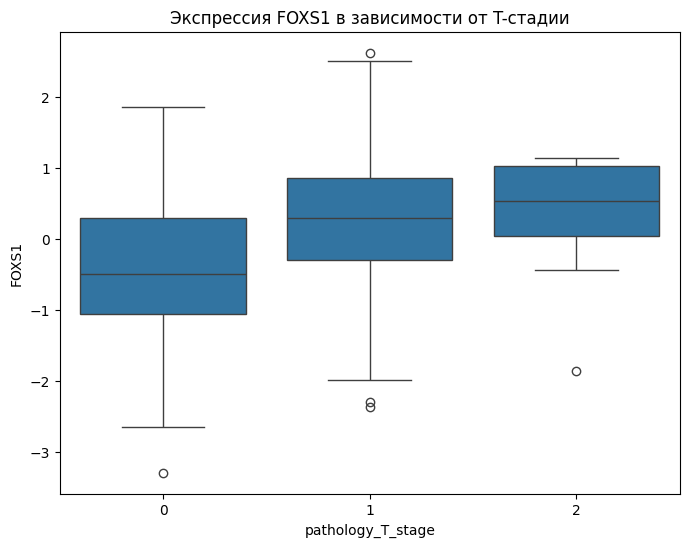

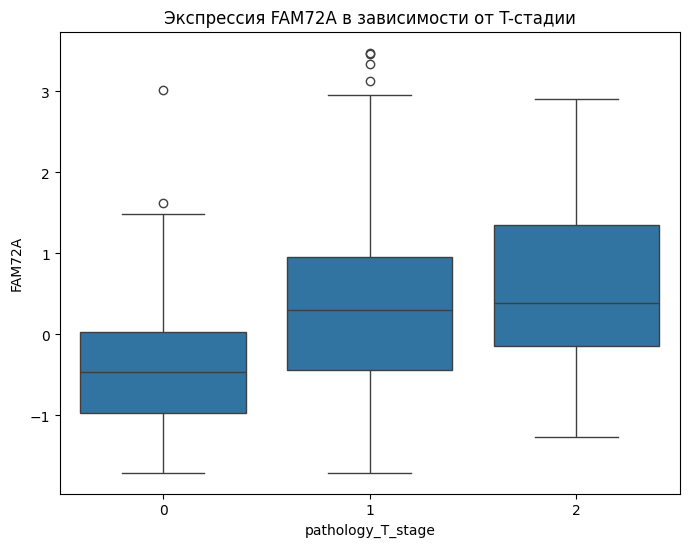

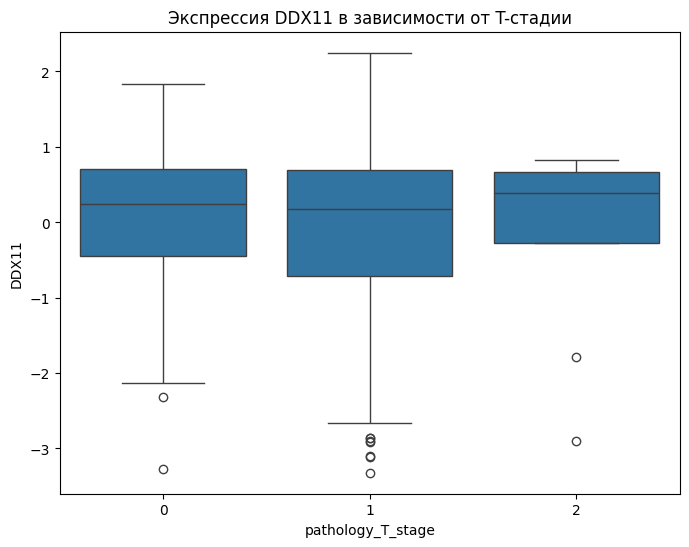

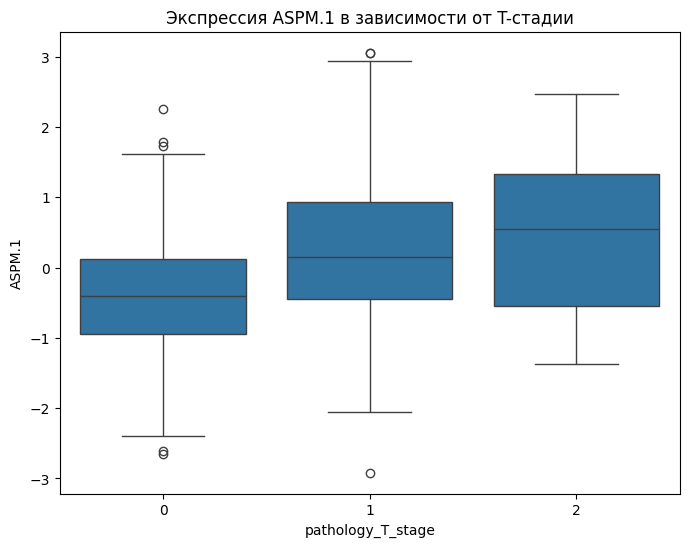

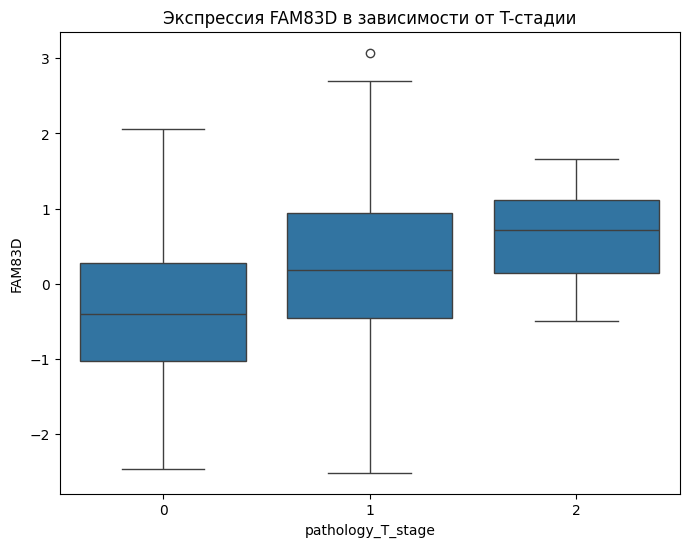

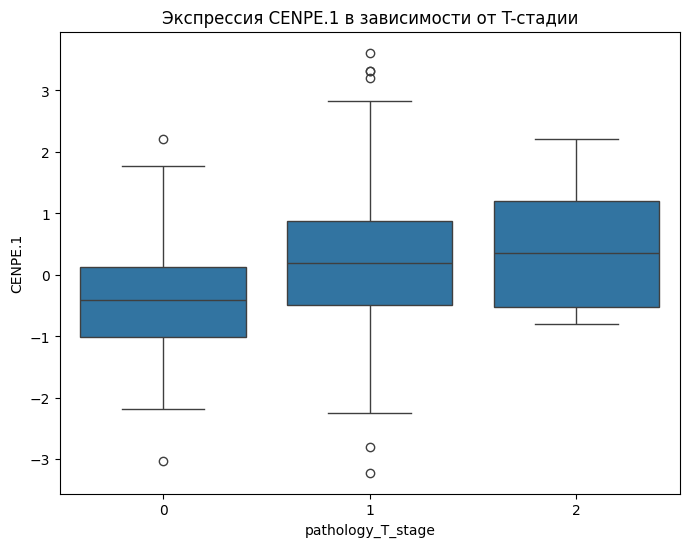

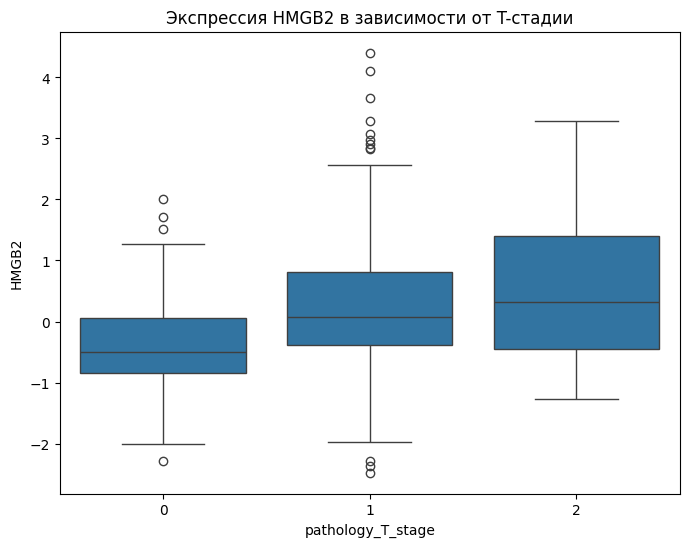

In [ ]:
# Гипотеза 1: Влияние пролиферации (например, FAM72A, DDX11) на T-стадию опухоли
genes_proliferation = ['FOXS1','FAM72A', 'DDX11', 'ASPM.1', 'FAM83D', 'CENPE.1','HMGB2']

# Проверим корреляцию с T-стадией
for gene in genes_proliferation:
    if gene in data.columns:
        corr = data[[gene, 'pathology_T_stage']].corr().iloc[0,1]
        print(f"Корреляция {gene} с T-стадией опухоли: {corr:.3f}")


# График распределения экспрессии FOXS1 по T-стадиям
if 'FOXS1' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='FOXS1', data=data)
    plt.title('Экспрессия FOXS1 в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии FAM72A по T-стадиям
if 'FAM72A' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='FAM72A', data=data)
    plt.title('Экспрессия FAM72A в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии DDX11 по T-стадиям
if 'DDX11' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='DDX11', data=data)
    plt.title('Экспрессия DDX11 в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии ASPM.1 по T-стадиям
if 'ASPM.1' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='ASPM.1', data=data)
    plt.title('Экспрессия ASPM.1 в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии FAM83D по T-стадиям
if 'FAM83D' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='FAM83D', data=data)
    plt.title('Экспрессия FAM83D в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии CENPE.1 по T-стадиям
if 'CENPE.1' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='CENPE.1', data=data)
    plt.title('Экспрессия CENPE.1 в зависимости от T-стадии')
    plt.show()

# График распределения экспрессии HMGB2 по T-стадиям
if 'HMGB2' in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='pathology_T_stage', y='HMGB2', data=data)
    plt.title('Экспрессия HMGB2 в зависимости от T-стадии')
    plt.show()

In [ ]:
# Гипотеза 3: Иммунные гены и чистота опухоли
immune_genes = ['SOCS2', 'BID']
for gene in immune_genes:
    if gene in data.columns:
        corr = data[[gene, 'Tumor_purity']].corr().iloc[0,1]
        print(f"Корреляция {gene} с чистотой опухоли (Tumor Purity): {corr:.3f}")

Корреляция SOCS2 с чистотой опухоли (Tumor Purity): 0.075
Корреляция BID с чистотой опухоли (Tumor Purity): -0.024


In [ ]:
!pip install statsmodels scipy

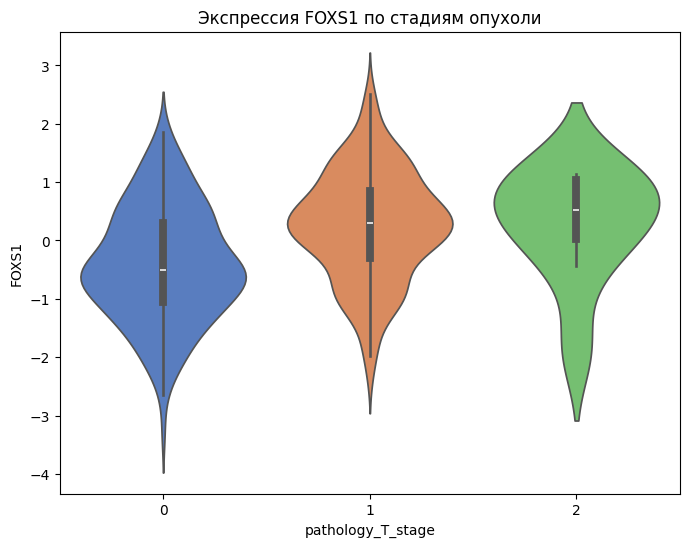

Ген: FOXS1
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.6601    0.0  0.4503 0.8698   True
     0      2     0.68 0.0915 -0.0824 1.4425  False
     1      2   0.0199 0.9979  -0.736 0.7758  False
---------------------------------------------------
--------------------------------------------------


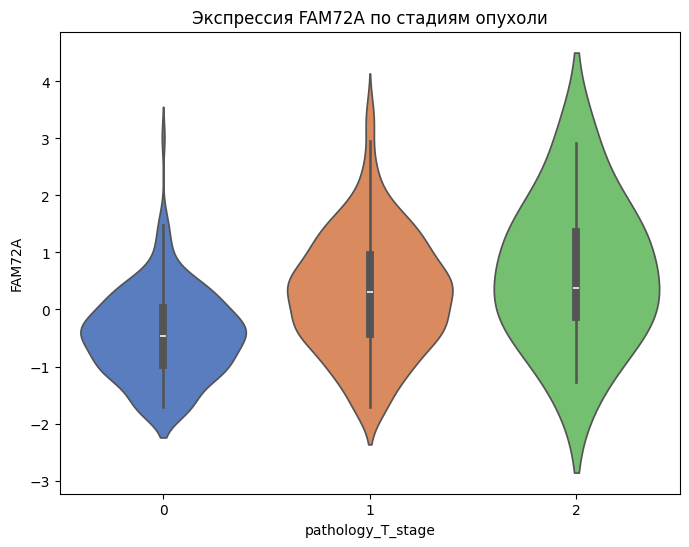

Ген: FAM72A
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.7133    0.0 0.5064 0.9203   True
     0      2   1.1002 0.0018 0.3478 1.8525   True
     1      2   0.3868 0.4423 -0.359 1.1327  False
--------------------------------------------------
--------------------------------------------------


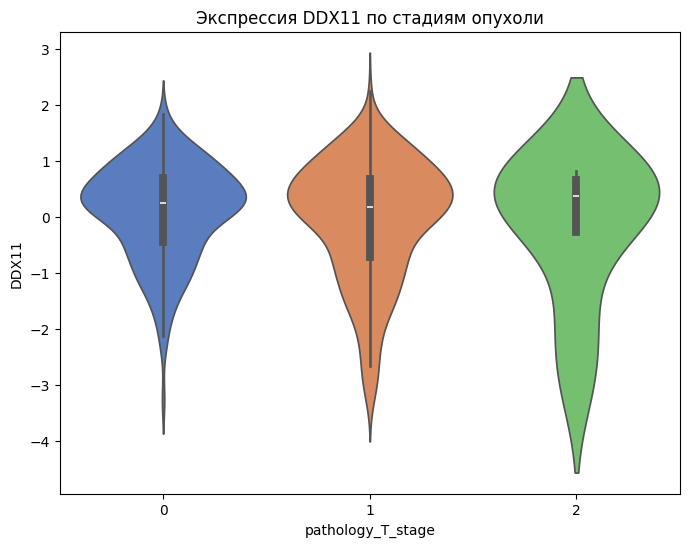

Ген: DDX11
  p-значение ANOVA: 0.2069
  p-значение Kruskal-Wallis: 0.5548
--------------------------------------------------


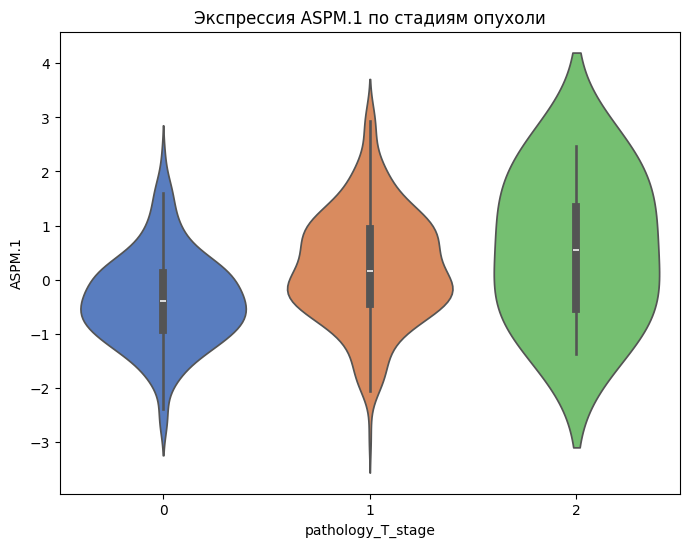

Ген: ASPM.1
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.5936    0.0  0.3821  0.805   True
     0      2   0.9534 0.0103  0.1848  1.722   True
     1      2   0.3598 0.5082 -0.4022 1.1218  False
---------------------------------------------------
--------------------------------------------------


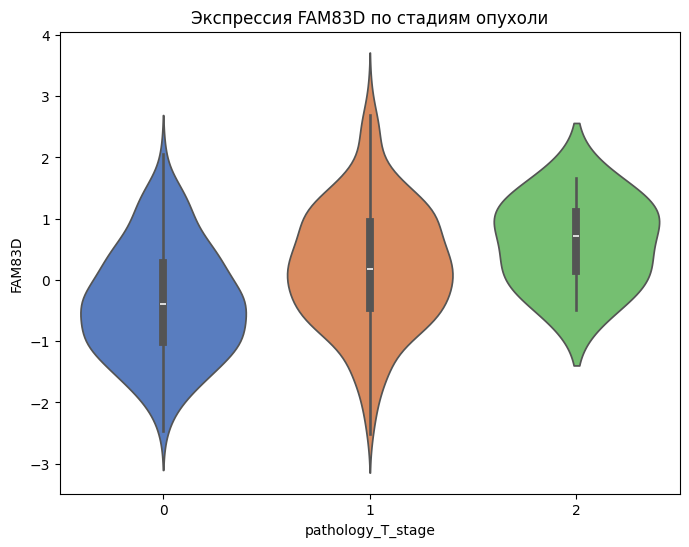

Ген: FAM83D
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.5997    0.0  0.3886 0.8109   True
     0      2   0.9882 0.0073  0.2207 1.7558   True
     1      2   0.3885 0.4536 -0.3725 1.1495  False
---------------------------------------------------
--------------------------------------------------


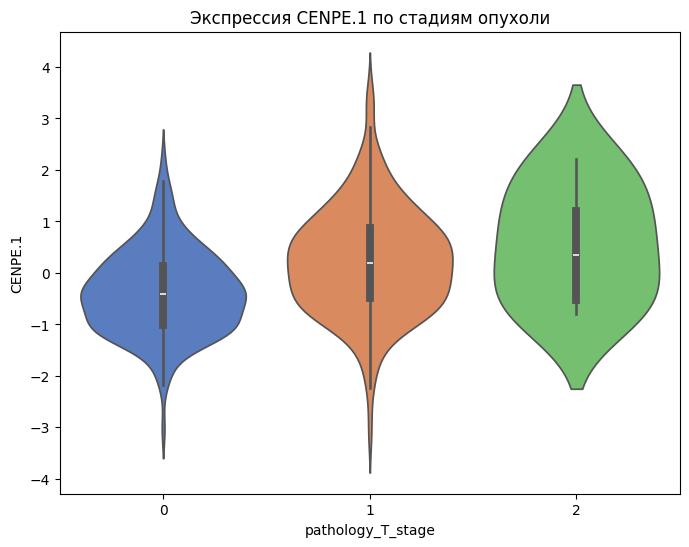

Ген: CENPE.1
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.6048    0.0  0.3937 0.8159   True
     0      2   0.9482 0.0107  0.1808 1.7155   True
     1      2   0.3434 0.5388 -0.4174 1.1041  False
---------------------------------------------------
--------------------------------------------------


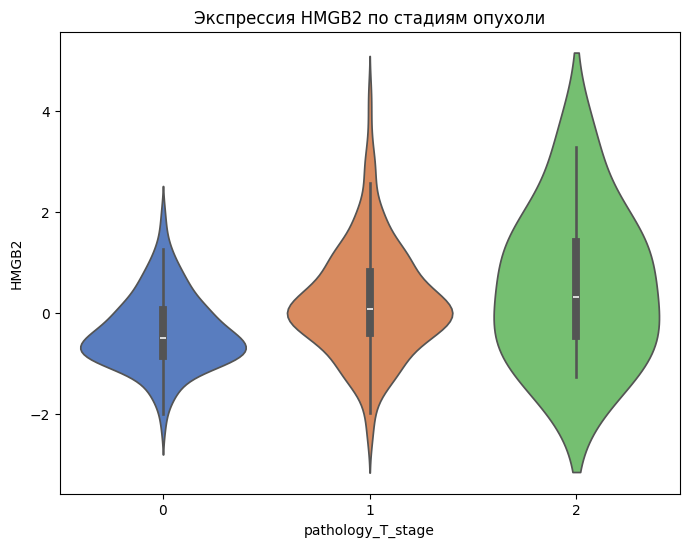

Ген: HMGB2
  p-значение ANOVA: 0.0000
  p-значение Kruskal-Wallis: 0.0000
  Пост-хок тест Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1    0.597    0.0  0.3856 0.8084   True
     0      2   0.9118 0.0151  0.1433 1.6804   True
     1      2   0.3149 0.5953 -0.4471 1.0768  False
---------------------------------------------------
--------------------------------------------------


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Применим исправление для "palette" в seaborn
def plot_violin_and_test(data, gene, group_col):
    # Violin plot с исправлением предупреждения
    plt.figure(figsize=(8,6))
    sns.violinplot(x=group_col, y=gene, data=data, inner='box', palette='muted', hue=group_col, legend=False)
    plt.title(f'Экспрессия {gene} по стадиям опухоли')
    plt.show()

    # Тест ANOVA
    groups = [data[data[group_col] == stage][gene] for stage in data[group_col].unique()]
    anova_p_value = f_oneway(*groups).pvalue

    # Тест Kruskal-Wallis
    kruskal_p_value = kruskal(*groups).pvalue

    # Пост-хок тест Tukey (если ANOVA p-value < 0.05)
    tukey_results = None
    if anova_p_value < 0.05:
        tukey_results = pairwise_tukeyhsd(data[gene], data[group_col], alpha=0.05)

    # Вывод результатов
    print(f"Ген: {gene}")
    print(f"  p-значение ANOVA: {anova_p_value:.4f}")
    print(f"  p-значение Kruskal-Wallis: {kruskal_p_value:.4f}")
    if tukey_results is not None:
        print("  Пост-хок тест Tukey:")
        print(tukey_results.summary())
    print("-" * 50)

# Применяем для всех генов
genes = ['FOXS1','FAM72A', 'DDX11', 'ASPM.1', 'FAM83D', 'CENPE.1','HMGB2']
for gene in genes:
    if gene in data.columns:
        plot_violin_and_test(data, gene, 'pathology_T_stage')

### Вывод:
Количество кейсов в группе T2 (всего 9) может оказывать влияние на результаты статистических анализов, особенно когда речь идет о сравнении между группами T1 и T2. В таких случаях малое количество наблюдений может привести к снижению статистической мощности тестов, что делает результаты менее надежными. Статистические тесты, такие как ANOVA и Kruskal-Wallis, могут не обнаружить реальных различий, если в группе с малым количеством данных наблюдения не репрезентативны или если вариативность внутри этой группы велика. Это особенно важно при интерпретации результатов для группы T2, так как малое количество наблюдений может привести к более высоким p-значениям и снижению точности выводов.

С учетом этих факторов, можно заметить следующее:

 - Для генов FAM72A, ASPM.1, FAM83D и CENPE.1 были получены значимые различия в экспрессии между стадиями 0 и 1, а также между стадиями 0 и 2. Однако стоит учитывать, что в группе T2 всего 9 наблюдений, и это может повлиять на стабильность результатов. Группы с небольшим количеством наблюдений подвержены большему уровню случайной вариации, что может привести к ошибочным выводам, особенно когда мы сравниваем стадию T1 с T2. Например, несмотря на значимость различий по FAM72A и другим генам, малое количество данных по T2 может означать, что найденные различия между T1 и T2 могут быть не совсем репрезентативными, и требуется больше данных для подтверждения этих выводов. Это также может объяснить, почему в некоторых случаях, например, между стадиями 1 и 2, не было найдено значительных различий, что также может быть связано с малым размером группы T2.

- Что касается гена DDX11, то его p-значения как по тесту ANOVA, так и по тесту Kruskal-Wallis были больше 0.05, что говорит о том, что нет статистически значимых различий в экспрессии между стадиями опухоли. Однако, учитывая малое количество данных по группе T2, мы можем сомневаться в том, что эти результаты точно отражают отсутствие связи между экспрессией DDX11 и стадиями опухоли. Это также могло быть причиной для получения высоких p-значений.

Заключение: Гипотезы о значимости различий между стадиями опухоли для FAM72A, ASPM.1, FAM83D и CENPE.1 на ранних стадиях (0 и 1) можно оставить, но выводы о сравнении с T2 требуют осторожности. Низкое количество данных в группе T2 означает, что любые выводы о различиях между T1 и T2 должны рассматриваться как предварительные, и необходимы дополнительные данные для более уверенного утверждения о статистической значимости.